In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

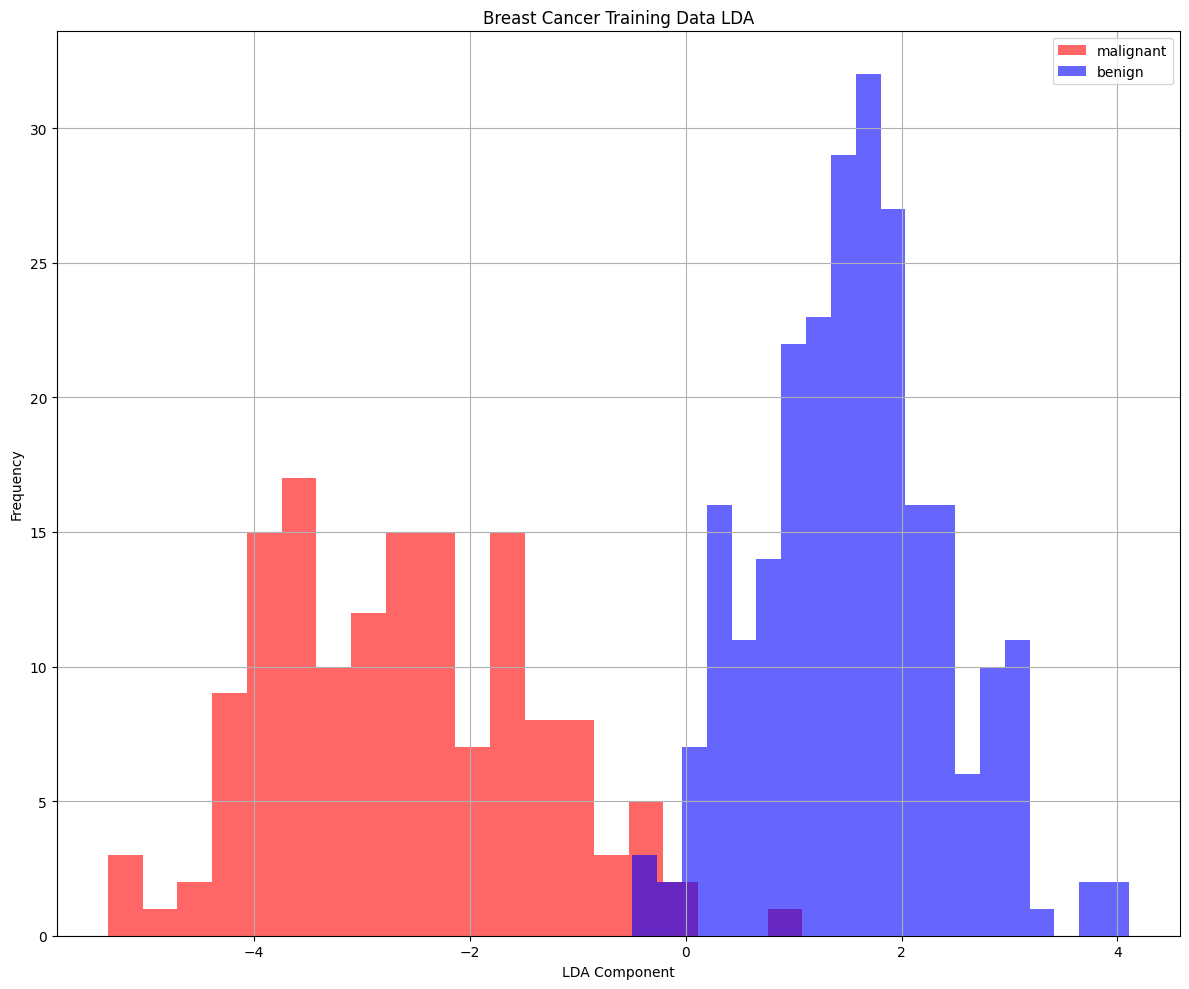

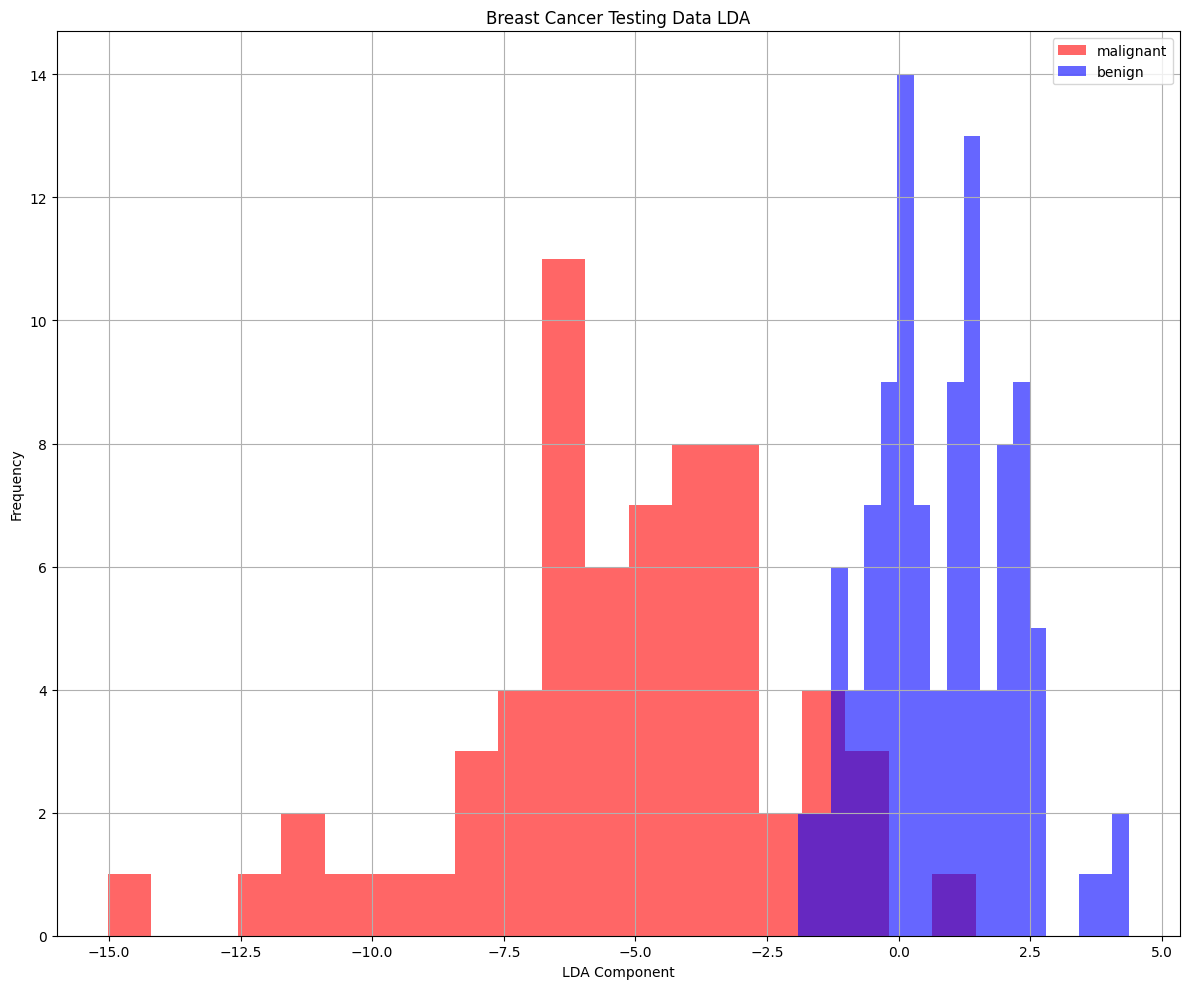

[I 2025-04-27 10:42:20,338] A new study created in memory with name: no-name-9429d5db-0e30-4482-80e7-23bd85aeeb42
[I 2025-04-27 10:42:22,286] Trial 0 finished with value: 0.9849683544303798 and parameters: {'n_estimators': 506, 'max_depth': 32, 'min_samples_split': 20, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9849683544303798.
[I 2025-04-27 10:42:23,013] Trial 1 finished with value: 0.9823101265822783 and parameters: {'n_estimators': 172, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9849683544303798.
[I 2025-04-27 10:42:26,239] Trial 2 finished with value: 0.9824050632911392 and parameters: {'n_estimators': 787, 'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9849683544303798.
[I 2025-04-27 10:42:28,051] Trial 3 finished with value: 0.9849050632911392 and parameters: {'n_estimators': 475, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 11}. Best is trial 0 wit

Best trial:
Accuracy: 0.9899050632911391
Best hyperparameters:  {'n_estimators': 100, 'max_depth': 24, 'min_samples_split': 20, 'min_samples_leaf': 2}


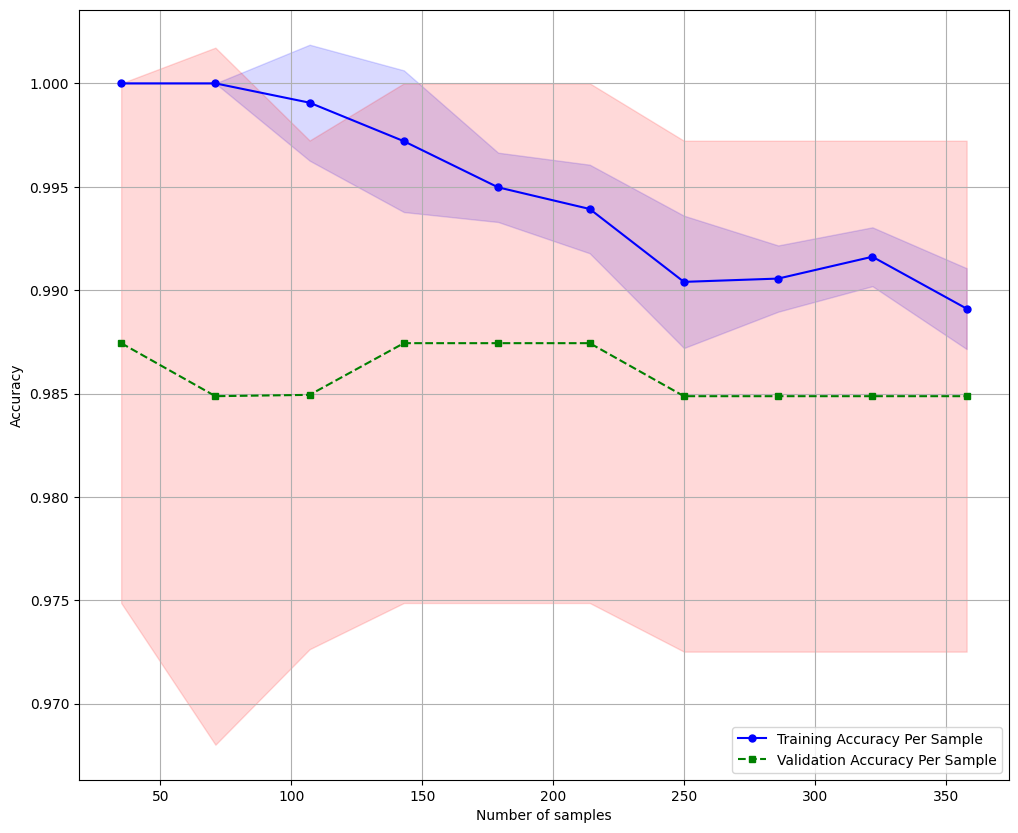

Confusion Matrix
[[62  2]
 [21 86]]
Accuracy: 0.8655, Precision: 0.9773, Recall: 0.8037, F1: 0.8821, AUC: 0.9260


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'lda', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)